In [77]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime 
from sklearn.preprocessing import MinMaxScaler

In [78]:
#reading main csv file
df = pd.read_csv('fatal-police-shootings-data.csv')

In [79]:
#checking data frame
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [80]:
# showing some basic information about the dataframe
df.describe()

,id,age
count,5480.000000,5243.000000
mean,3046.091971,37.119588
std,1717.121067,13.126959
min,3.000000,6.000000
25%,1563.750000,27.000000
50%,3046.000000,35.000000
75%,4545.250000,46.000000
max,6001.000000,91.000000


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5480 entries, 0 to 5479
Data columns (total 14 columns):
id                         5480 non-null int64
name                       5480 non-null object
date                       5480 non-null object
manner_of_death            5480 non-null object
armed                      5268 non-null object
age                        5243 non-null float64
gender                     5479 non-null object
race                       4934 non-null object
city                       5480 non-null object
state                      5480 non-null object
signs_of_mental_illness    5480 non-null bool
threat_level               5480 non-null object
flee                       5224 non-null object
body_camera                5480 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 524.5+ KB


In [82]:
# drop rows including missing data (since number of null data with respect to the whole dataset we can drop the rows)
df = df.dropna(subset=['armed','age','gender','race','flee'])
df.isna().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4449 entries, 0 to 5479
Data columns (total 14 columns):
id                         4449 non-null int64
name                       4449 non-null object
date                       4449 non-null object
manner_of_death            4449 non-null object
armed                      4449 non-null object
age                        4449 non-null float64
gender                     4449 non-null object
race                       4449 non-null object
city                       4449 non-null object
state                      4449 non-null object
signs_of_mental_illness    4449 non-null bool
threat_level               4449 non-null object
flee                       4449 non-null object
body_camera                4449 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 460.5+ KB


# Question 1

Any seasonality?  Do shootings increase/decrease at certain times of year?
On weekends/holidays?

In [84]:
#creating a dataframe with months of the year and total number of shootings in each corresponding month
import calendar

df['date'] = df['date'].astype('datetime64[ns]')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df_month=df.groupby(['month']).size().reset_index(name='count')
df_month=df_month.sort_values('month')
df_month['month'] = df_month['month'].apply(lambda x: calendar.month_abbr[x])
df_month.head()


,month,count
0,Jan,469
1,Feb,420
2,Mar,449
3,Apr,383
4,May,378


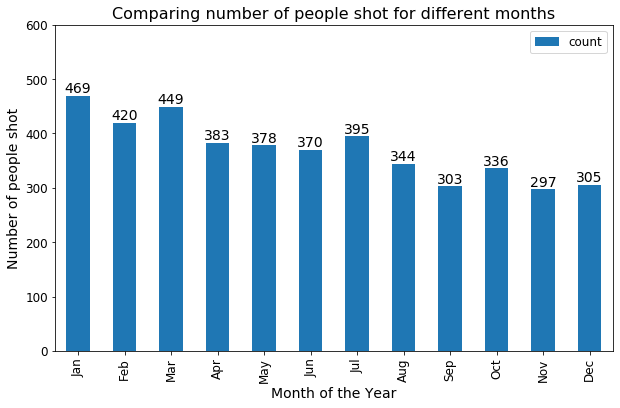

In [85]:

#Creating a bar chart based on the dataframe above.

ax = df_month.plot(kind='bar',x='month',y='count',figsize=(10,6))
data_dict = df_month.values.tolist() 

values=[]
for i in data_dict:
        values.append(i[1])
        
rects = ax.patches

def autolabel(rects):
    for rect in rects:
        height = round(rect.get_height(),2)
        ax.annotate('{}'.format(height),
        xy=(rect.get_x() + rect.get_width() / 2, height+0.01),
        xytext=(0, 0.08),  # 3 points vertical offset
        textcoords="offset points",
        fontsize=14,
        ha='center', va='bottom')
autolabel(rects)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)


plt.ylim(0,600)
plt.xlabel('Month of the Year',fontsize=14)
plt.ylabel('Number of people shot',fontsize=14)
plt.title('Comparing number of people shot for different months',fontsize=16)
None

In [186]:
# Next we create a table with total number of shootings per days of the week.
df['day of week'] = df['date'].dt.dayofweek
df_day=df.groupby(['day of week']).size().reset_index(name='count')
df_day=df_day.sort_values('day of week')
df_day['day of week'] = df_day['day of week'].apply(lambda x: calendar.day_abbr[x])
df_day.head()


,day of week,count
0,Mon,615
1,Tue,665
2,Wed,677
3,Thu,670
4,Fri,604


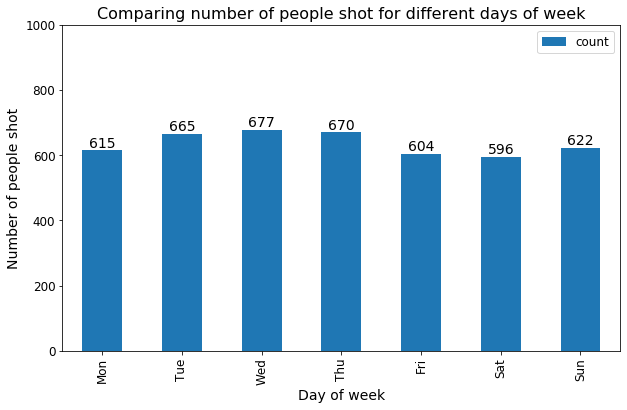

In [187]:
#Creating a bar chart based on the dataframe above.

ax = df_day.plot(kind='bar',x='day of week',y='count',figsize=(10,6))
data_dict = df_day.values.tolist() 
values=[]
for i in data_dict:
        values.append(i[1])
        
rects = ax.patches

def autolabel(rects):
    for rect in rects:
        height = round(rect.get_height(),2)
        ax.annotate('{}'.format(height),
        xy=(rect.get_x() + rect.get_width() / 2, height+0.01),
        xytext=(0, 0.08),  # 3 points vertical offset
        textcoords="offset points",
        fontsize=14,
        ha='center', va='bottom')
autolabel(rects)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)


plt.ylim(0,1000)
plt.xlabel('Day of week',fontsize=14)
plt.ylabel('Number of people shot',fontsize=14)
plt.title('Comparing number of people shot for different days of week',fontsize=16)
None

In [182]:
df_day.head()
index=['weekday','weekend']
columns=['average shootings']
list=[sum(df_day.loc[0:5, 'count'])/5,sum(df_day.loc[5:7, 'count'])/2]

average_shooting = pd.DataFrame(list,index=index, columns=columns)
average_shooting

,average shootings
weekday,765.4
weekend,609.0


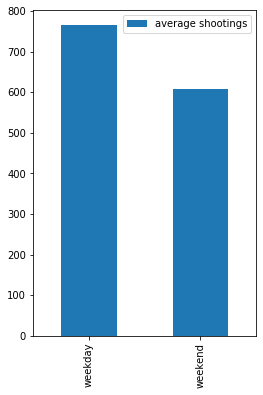

In [183]:
average_shooting.plot(kind='bar',figsize=(4,6))

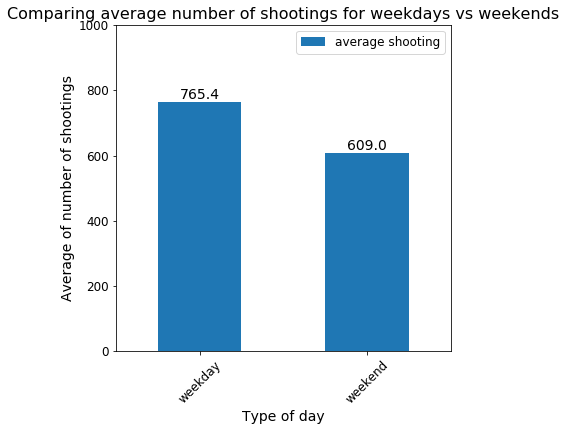

In [181]:
ax = average_shooting.plot(kind='bar',figsize=(6,6))
data_dict = average_shooting.values.tolist() 
values=[]
for i in data_dict:
        values.append(i[0])
        
rects = ax.patches

def autolabel(rects):
    for rect in rects:
        height = round(rect.get_height(),2)
        ax.annotate('{}'.format(height),
        xy=(rect.get_x() + rect.get_width() / 2, height+0.01),
        xytext=(0, 0.08),  # 3 points vertical offset
        textcoords="offset points",
        fontsize=14,
        ha='center', va='bottom')
autolabel(rects)

plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)


plt.ylim(0,1000)
plt.xlabel('Type of day',fontsize=14)
plt.ylabel('Average of number of shootings',fontsize=14)
plt.title('Comparing average number of shootings for weekdays vs weekends',fontsize=16)
None

# Question 2

Is there any relation between poverty rates in states and their fatal shooting rate?

In [88]:
df_citystate = df[['city','state']]
df_citystate.drop_duplicates().head()
df_citystate.head()

,city,state
0,Shelton,WA
1,Aloha,OR
2,Wichita,KS
3,San Francisco,CA
4,Evans,CO


In [132]:
df_poverty = pd.read_csv('poverty_rate.csv').rename(columns={'Total':'poverty rate'})
df_poverty.head()



,Location,poverty rate
0,Alabama,0.17
1,Alaska,0.11
2,Arizona,0.14
3,Arkansas,0.17
4,California,0.13


In [110]:
df_state_shooting = df.groupby(['state']).size().reset_index(name='shootings rate')
df_state_shooting.to_csv(r'C:\Users\farid\Desktop\Data Science - UofT\Final project\state_shooting.csv', index = False)
df_state_shooting.head()

us_state_abbrev = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

df_state_shooting['state'] = df_state_shooting['state'].map(us_state_abbrev)
df_state_population = pd.read_csv('state_population.csv')

df_state_shooting['population']=df_state_population['2019']
df_state_shooting['shootings per population'] = df_state_shooting['shootings rate']/(df_state_shooting.population)

df_state_shooting.head()

,state,shootings rate,population,shootings per population
0,Alaska,33,4903185,0.000007
1,Alabama,86,731545,0.000118
2,Arkansas,63,7278717,0.000009
3,Arizona,201,3017804,0.000067
4,California,631,39512223,0.000016


In [111]:
# Create x, where x the 'scores' column
scaler = MinMaxScaler()
df_state_shooting[['shootings rate','shootings per population']] = scaler.fit_transform(df_state_shooting[['shootings rate','shootings per population']])
df_state_shooting = df_state_shooting.drop(['population'],axis=1)
df_state_shooting

,state,shootings rate,shootings per population
0,Alaska,0.049285,0.042822
1,Alabama,0.133545,0.862060
2,Arkansas,0.096979,0.057052
3,Arizona,0.316375,0.485408
4,California,1.000000,0.111119
5,Colorado,0.246423,0.194597
6,Connecticut,0.023847,0.028318
7,District of Columbia,0.017488,0.091756
8,Delaware,0.011129,0.087336
9,Florida,0.473768,0.096322


In [113]:
df_poverty[['poverty rate']] = scaler.fit_transform(df_poverty[['poverty rate']])
df_poverty.head()

,Location,poverty rate
0,Alabama,0.769231
1,Alaska,0.307692
2,Arizona,0.538462
3,Arkansas,0.769231
4,California,0.461538


In [115]:
df_state_shooting_poverty = df_state_shooting.join(df_poverty['poverty rate'])
df_state_shooting_poverty.head()

,state,shootings rate,shootings per population,poverty rate
0,Alaska,0.049285,0.042822,0.769231
1,Alabama,0.133545,0.862060,0.307692
2,Arkansas,0.096979,0.057052,0.538462
3,Arizona,0.316375,0.485408,0.769231
4,California,1.000000,0.111119,0.461538


In [118]:
df_state_shooting_poverty[['shootings rate','poverty rate']].corr()

,shootings rate,poverty rate
shootings rate,1.000000,0.173367
poverty rate,0.173367,1.000000


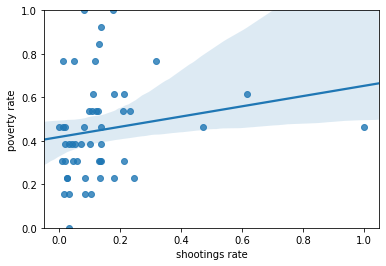

In [123]:
sns.regplot(x="shootings rate", y="poverty rate", data=df_state_shooting_poverty)
plt.ylim(0,1)
None

We don't see any significant correlation here. Next we will try shooting per population of each state.

In [125]:
df_state_shooting_poverty[['shootings per population','poverty rate']].corr()

,shootings per population,poverty rate
shootings per population,1.0000,-0.0248
poverty rate,-0.0248,1.0000


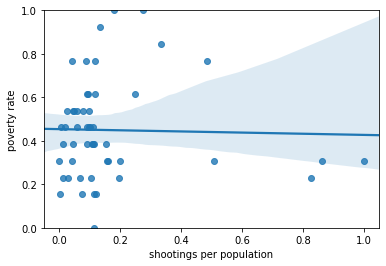

In [126]:
sns.regplot(x="shootings per population", y="poverty rate", data=df_state_shooting_poverty)
plt.ylim(0,1)
None

# Question 3

Is there any relation between illiteracy rates in US states and their fatal shooting rate?

In [131]:
df_illiteracy = pd.read_csv('illiteracy_rate.csv').rename(columns={'State':'state'})
df_illiteracy.head()


,state,illiteracy rate
0,Alabama,0.148
1,Alaska,0.092
2,Arizona,0.131
3,Arkansas,0.137
4,California,0.231


In [133]:
df_illiteracy[['illiteracy rate']] = scaler.fit_transform(df_illiteracy[['illiteracy rate']])
df_illiteracy.head()

,state,illiteracy rate
0,Alabama,0.520231
1,Alaska,0.196532
2,Arizona,0.421965
3,Arkansas,0.456647
4,California,1.000000


In [134]:
df_state_shooting_illiteracy = df_state_shooting.join(df_illiteracy['illiteracy rate'])
df_state_shooting_illiteracy.head()

,state,shootings rate,shootings per population,illiteracy rate
0,Alaska,0.049285,0.042822,0.520231
1,Alabama,0.133545,0.862060,0.196532
2,Arkansas,0.096979,0.057052,0.421965
3,Arizona,0.316375,0.485408,0.456647
4,California,1.000000,0.111119,1.000000


In [135]:
df_state_shooting_illiteracy[['shootings rate','illiteracy rate']].corr()

,shootings rate,illiteracy rate
shootings rate,1.000000,0.474776
illiteracy rate,0.474776,1.000000


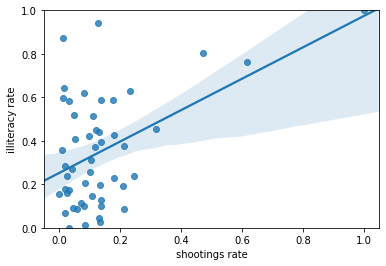

In [136]:
sns.regplot(x="shootings rate", y="illiteracy rate", data=df_state_shooting_illiteracy)
plt.ylim(0,1)
None

In [138]:
df_state_shooting_illiteracy[['shootings per population','illiteracy rate']].corr()

,shootings per population,illiteracy rate
shootings per population,1.000000,-0.258595
illiteracy rate,-0.258595,1.000000


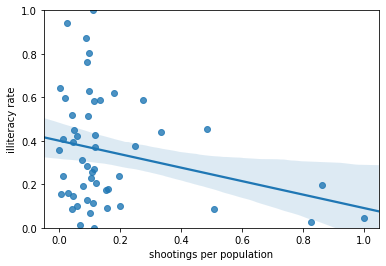

In [139]:
sns.regplot(x="shootings per population", y="illiteracy rate", data=df_state_shooting_illiteracy)
plt.ylim(0,1)
None

In [ ]:
#Analysis is provided in the main report. 